In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv("data_out.csv")
df = df.iloc[: , 1:5]
df

,room,rod,tp,lid
0,1,-29,-83,-51
1,1,-29,-78,-39
2,1,-44,-80,-59
3,1,-34,-88,-56
4,1,-43,-84,-58
5,1,-34,-88,-40
6,1,-50,-77,-47
7,1,-32,-87,-58
8,1,-48,-85,-55
9,1,-39,-87,-52


In [3]:
X = df[df.columns.difference(["room"])]
y = df["room"]

y.value_counts()

2    14
3    13
1    11
Name: room, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)
y_test.value_counts()

1    5
2    2
3    1
Name: room, dtype: int64

In [5]:
y_train.value_counts()

2    13
3     9
1     8
Name: room, dtype: int64

In [13]:
clf = svm.SVC(kernel = "linear", C = 1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
X_test

,lid,rod,tp
8,-55,-48,-85
29,-39,-64,-60
27,-44,-72,-67
5,-40,-34,-88
25,-45,-70,-59
10,-50,-43,-91
31,-44,-75,-70
15,-33,-65,-70


In [16]:
y_test

4     1
5     1
13    2
25    3
22    2
1     1
0     1
9     1
Name: room, dtype: int64

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 2, 3, 2, 1, 1, 1], dtype=int64)

1.0
1.0
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



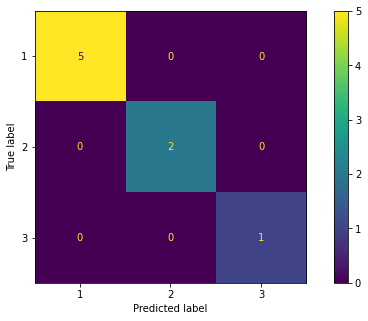

In [15]:
plt.rcParams['figure.figsize'] = 10, 5

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, X_test, y_test)

In [17]:
!pip install micromlgen

In [18]:
from micromlgen import port

In [19]:
LABELS = ['1','2','3'] #our existing labels
classMap = {} #create an empty dict
for i, label in zip(range(3),LABELS): #interate over the range and the labels at the same time 
  classMap[i]=label #fill our dict

print(classMap)

{0: '1', 1: '2', 2: '3'}


In [74]:
c_code = port(clf,classmap=classMap) #convert our model
modelFile = open("model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 4,009 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
